<center> <h2> AFNAN HOSSAIN </h2> </center>
<center> <h3> Zomato Sales Analysis (EDA) </h3> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.shape

(51717, 17)

# Dropping Columns

In [5]:
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item',"listed_in(city)"], axis=1, inplace=True)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [7]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [8]:
# df.drop_duplicates(inplace=True)
# df.shape

# Cleaning Data set

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'].isna().sum()

7775

In [11]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
dtype: object

In [12]:
def handelrate(values):
    if(values== 'NEW' or values =='-' ):
        return np.nan
    else:
        values=str(values).split('/')
        values=values[0]
        return round(float(values),1)
df['rate']= df['rate'].apply(handelrate)
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [13]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [14]:
df['rate'].fillna(df['rate'].mean(), inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
location= df['location'].value_counts()

In [17]:
loct_n= location[location<300]

In [18]:
def handellocation(value):
    if (value in loct_n):
        return "Others"
    else:
        return value
df['location']=df['location'].apply(handellocation)

In [19]:
df['location'].value_counts()[:5]

BTM                      5071
Others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Name: location, dtype: int64

In [20]:
df['rest_type'].value_counts()

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [21]:
rest_tp=df['rest_type'].value_counts()

In [22]:
rest_type=rest_tp[rest_tp<1000]

In [23]:
def handlerest_type(value):
    if (value in rest_type):
        return 'Others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handlerest_type) 
df['rest_type'].value_counts()

Quick Bites           19046
Casual Dining         10273
Others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

In [24]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Visualizing Count plot of various location 

Text(0.5, 1.0, 'Visualizing Count plot of various location.')

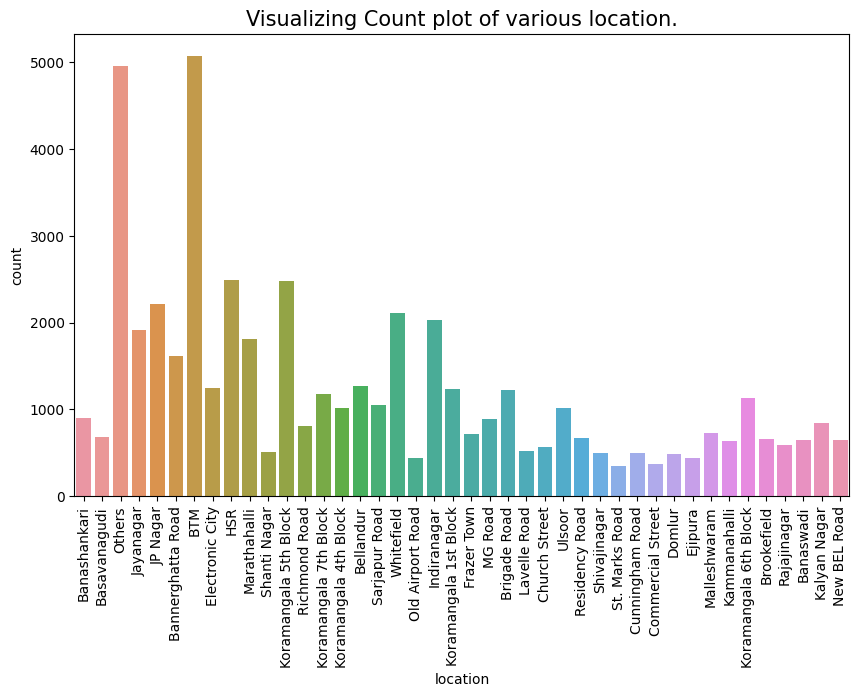

In [25]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='location', data=df)
plt.xticks(rotation=90)
plt.title('Visualizing Count plot of various location.', size=15)

# Visualizing online order 

Text(0.5, 1.0, 'Count plot of online order.')

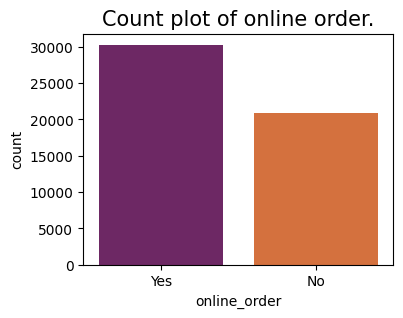

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(x='online_order', data=df,palette='inferno')
plt.title('Count plot of online order.', size=15)

# Visualizing book table

Text(0.5, 1.0, 'Count plot of Book Table.')

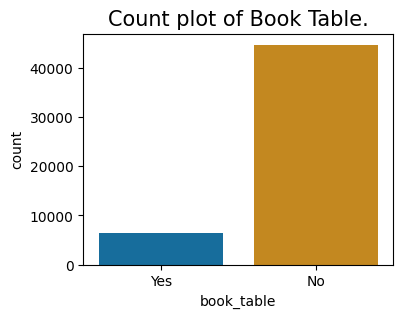

In [28]:
plt.figure(figsize=(4,3))
sns.countplot(x='book_table', data=df,palette='colorblind')
plt.title('Count plot of Book Table.', size=15)

In [29]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Visualizing Online order vs Rate.

Text(0.5, 1.0, ' Visualizing Online order vs Rate.')

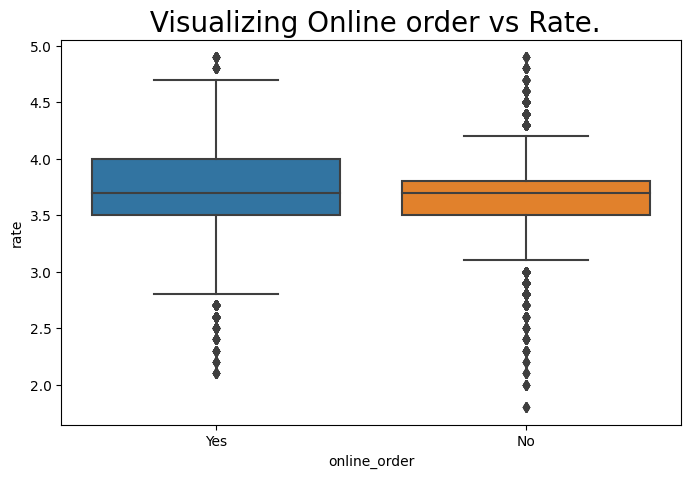

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title(' Visualizing Online order vs Rate.', size=20)

 - We can say that the average rating of restaurants that offer online delivery and those that do not offer online delivery is almost the same.

In [31]:
filt=df['online_order']=='Yes'
df[filt]['rate'].mean()

3.7214588847880394

In [32]:
filt=df['online_order']=='No'
df[filt]['rate'].mean()

3.672980578233544

# Visualizing Book Table vs Rate.

Text(0.5, 1.0, 'Visualizing Book Table vs Rate.')

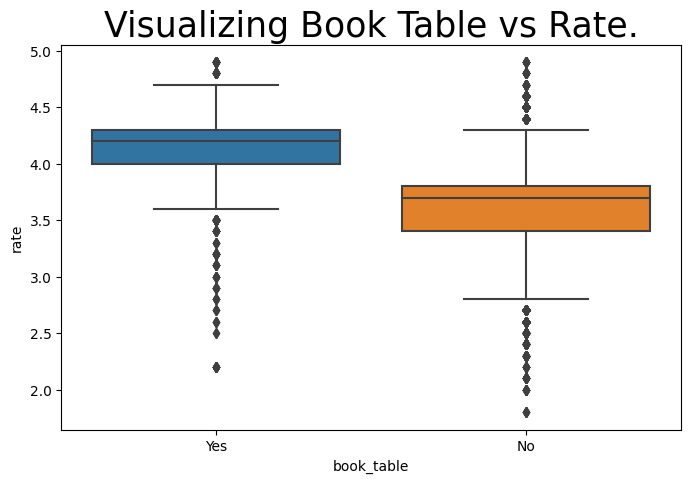

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='book_table',y='rate', data=df)
plt.title('Visualizing Book Table vs Rate.', size=25)

- We can say that the average rating of restaurants that offer table booking is much higher than those that do not offer table booking.

# Visulizing Online order facility location wise

In [34]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1, index='location', columns='online_order', aggfunc=np.sum)

In [35]:
df1.head()

name      
online_order         No   Yes
location                     
BTM                1766  3305
Banashankari        397   507
Banaswadi           302   343
Bannerghatta Road   687   924
Basavanagudi        243   441

Text(0.5, 1.0, 'Visulizing online order facility location wise')

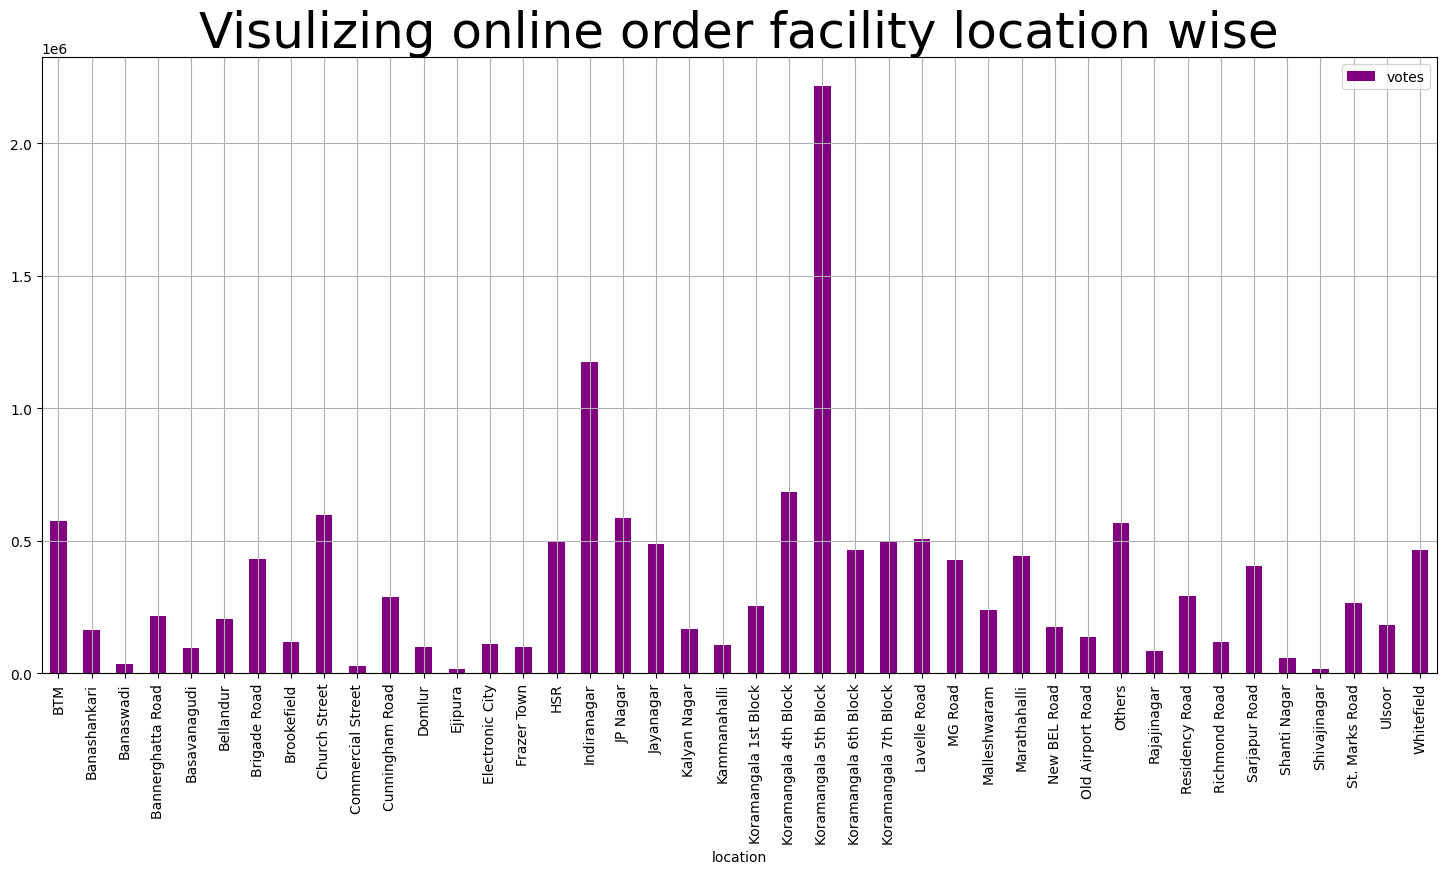

In [110]:
df1.plot(kind='bar', figsize=(18,8), color='purple')
plt.grid()
plt.title('Visulizing online order facility location wise', size=36)

In [37]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Visulizing Book Table facility location wise

In [38]:
df2= df.groupby(['location','book_table'])['name'].count()
df2.to_csv('lb.csv')
df2=pd.read_csv('lb.csv')
df2= pd.pivot_table(df2,index='location', columns='book_table',values=None,fill_value=0, aggfunc= np.sum)
df2.head()

name     
book_table           No  Yes
location                    
BTM                4903  168
Banashankari        840   64
Banaswadi           637    8
Bannerghatta Road  1512   99
Basavanagudi        668   16

Text(0.5, 1.0, 'Visulizing Book Table facility location wise')

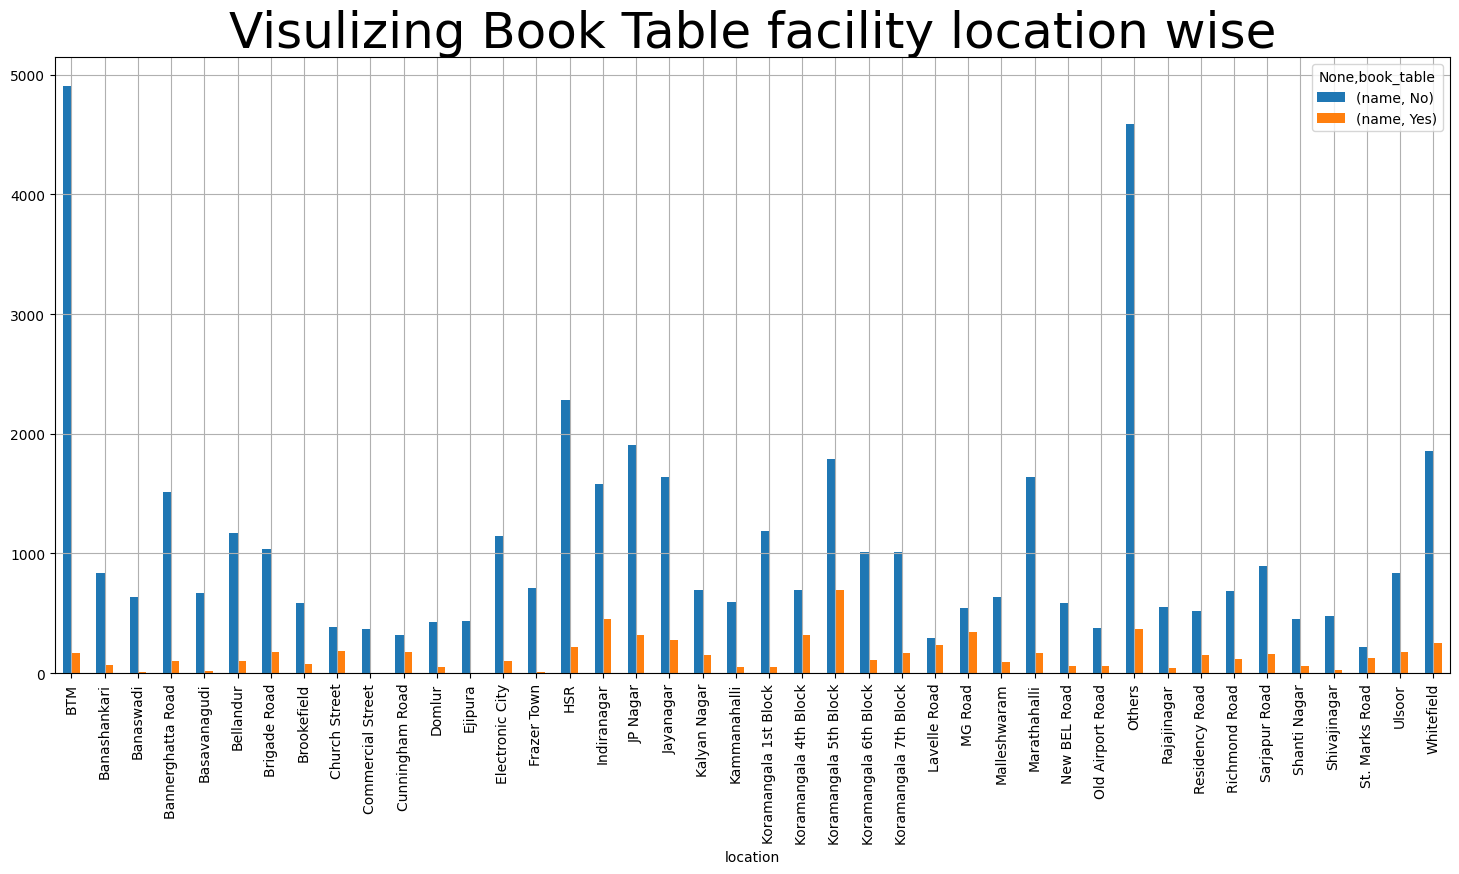

In [39]:
df2.plot(kind='bar', figsize=(18,8))
plt.grid()
plt.title('Visulizing Book Table facility location wise', size=36)

# Visualizing Restaurant Type vs Rate.

Text(0.5, 1.0, 'Visualizing Restaurant Type vs Rate.')

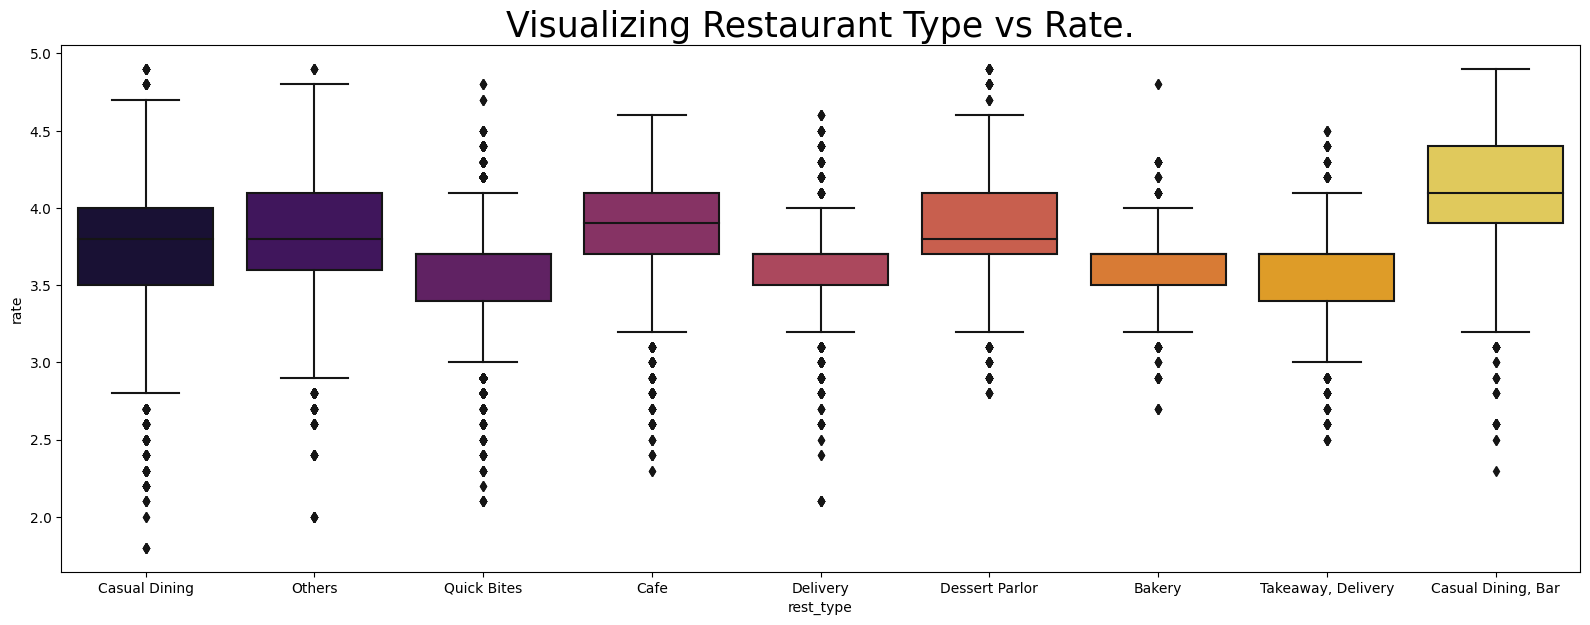

In [40]:
plt.figure(figsize=(16,6))
sns.boxplot(x='rest_type', y= 'rate', data=df, palette='inferno')
plt.tight_layout()
plt.title('Visualizing Restaurant Type vs Rate.', size=25)


- We can say that the average rating for restaurant type is casual dining and bars, cafes are highly rated.

In [41]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Visualizing Restaurant Type Location Wise.

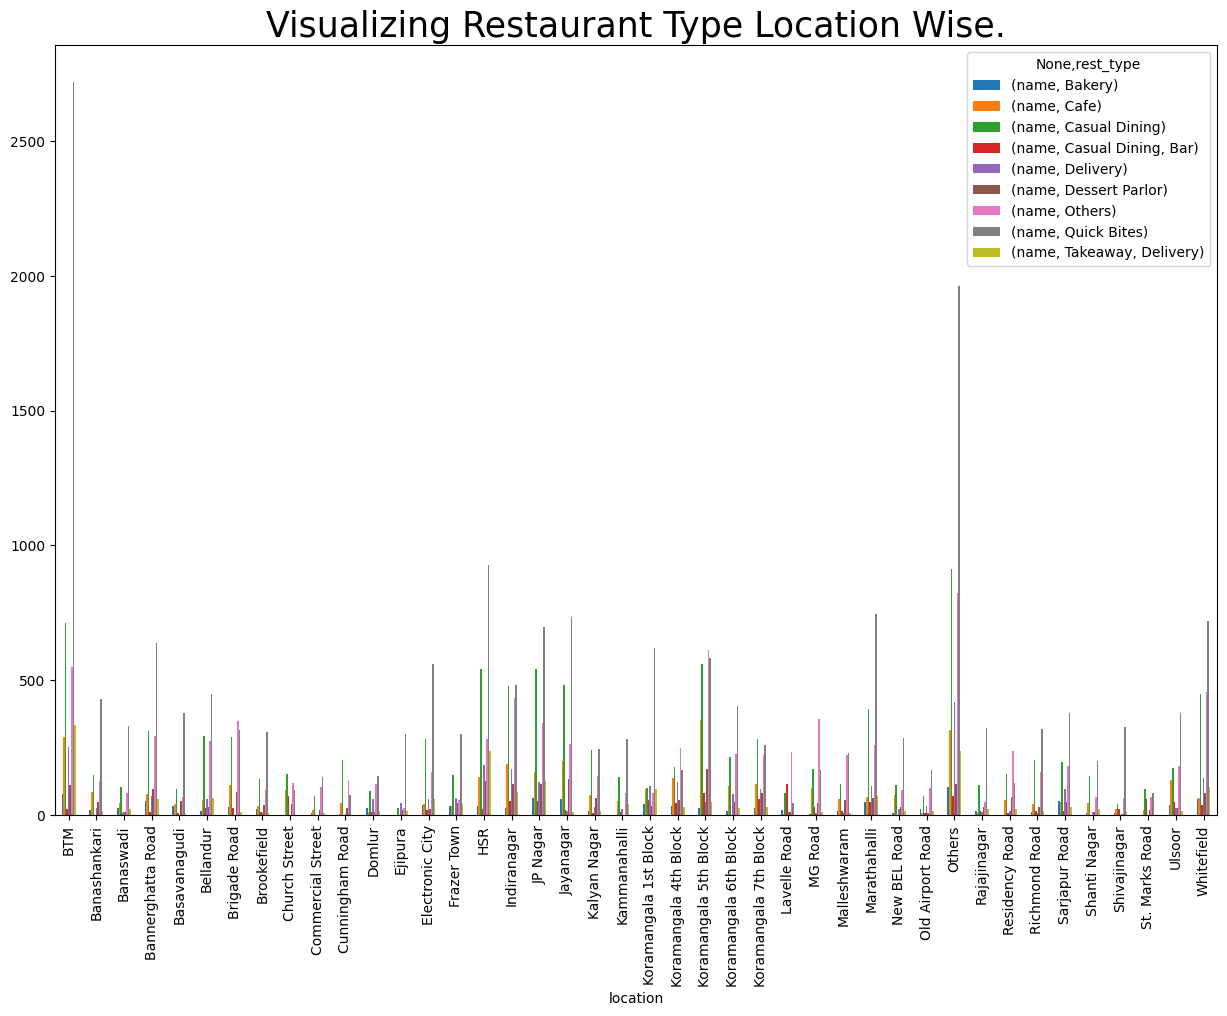

In [42]:
df8= df.groupby(['location','rest_type'])['name'].count()
df8.to_csv('rts.csv')
df8=pd.read_csv('rts.csv')

df8.pivot_table(index='location', columns= 'rest_type', values=None, fill_value=0).plot(kind='bar', figsize=(15,10))
plt.title('Visualizing Restaurant Type Location Wise.', size=25)
plt.grid(False)

# Number of Votes Location Wise

C:\Users\User\AppData\Local\Temp\ipykernel_15940\2071629063.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  x=df.pivot_table(index='location', aggfunc='sum')


Text(0.5, 1.0, 'Number of Votes Location Wise')

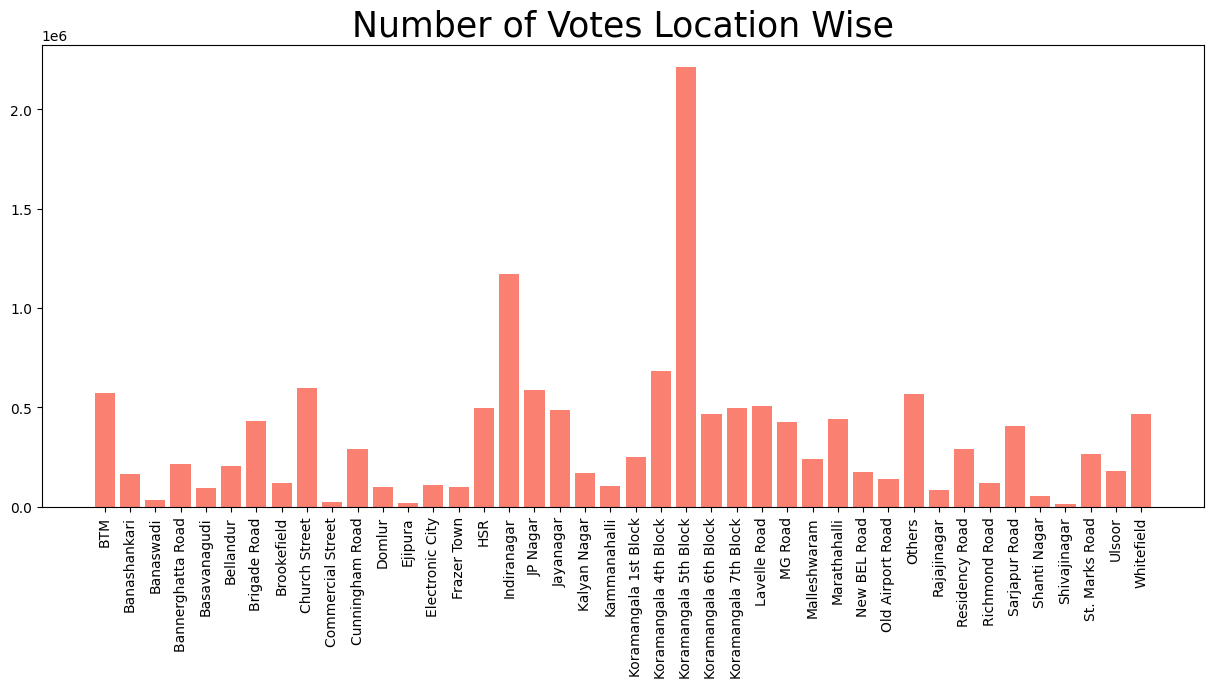

In [103]:
x=df.pivot_table(index='location', aggfunc='sum')
plt.figure(figsize=(15,6))
plt.bar(x.index,x['votes'], color='Salmon')
plt.xticks(rotation=90)
plt.title('Number of Votes Location Wise', size=25)

# Visualizing The Top Cuisine

In [53]:
cuisin=df['cuisines'].value_counts()
cuisines_n=cuisin[cuisin <300]

In [48]:
def handelcuisines(x):
    if( x in cuisines_n):
        return'Others'
    else:
        return x      

In [52]:
df['cuisines']= df['cuisines'].apply(handelcuisines)

C:\Users\User\AppData\Local\Temp\ipykernel_15940\2580689085.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  x=df.pivot_table(index='cuisines', aggfunc='sum')


Text(0.5, 1.0, 'Visualizing The Top Cuisine')

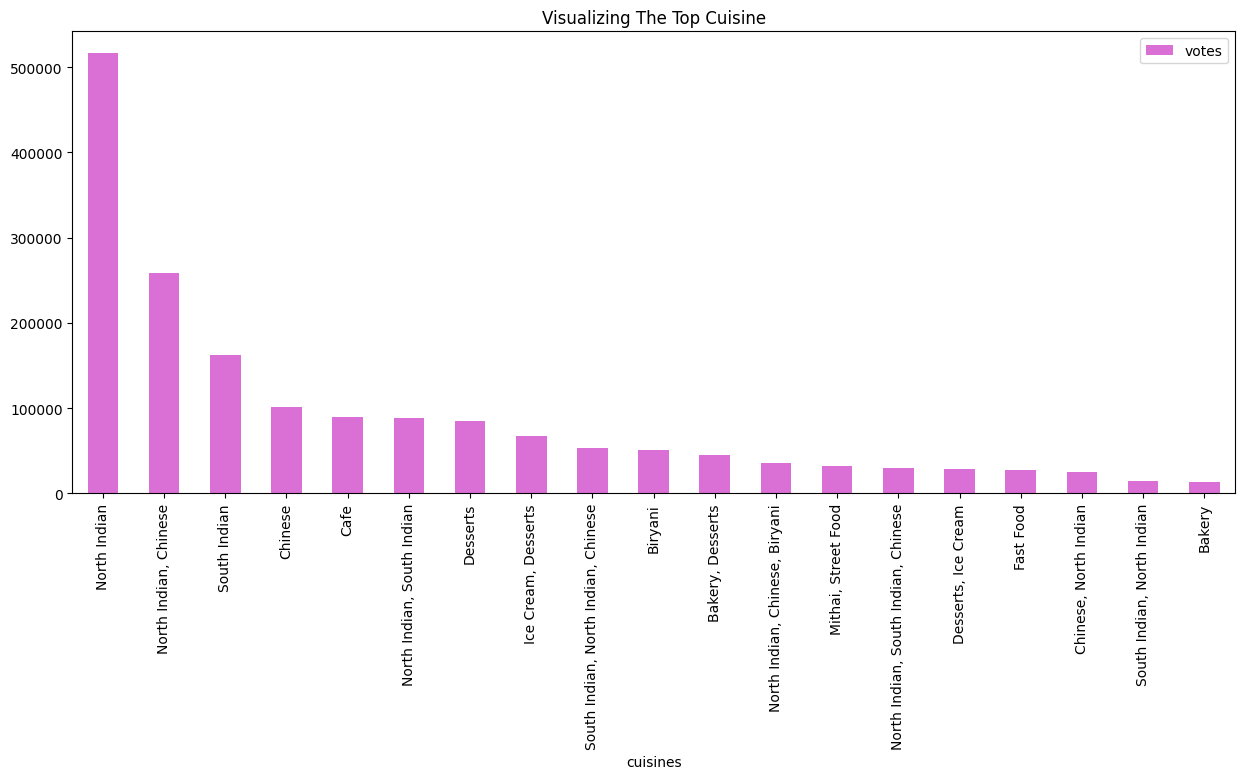

In [111]:
x=df.pivot_table(index='cuisines', aggfunc='sum')
x=x['votes'].to_frame()
x.sort_values('votes',ascending=False).iloc[1:,:].plot(kind='bar',figsize=(15,6),color='orchid')
plt.title('Visualizing The Top Cuisine')